In [3]:
import  import_ipynb
import pandas as pd
from data_scraping import Yahoo_scraper  as ys

In [4]:
local_object = ys(start_date = '2022-12-21',end_date = '2024-09-30',interval = '1d')
data = local_object.historical_data()
data

,Open,High,Low,Close
Date,,,,
2022-12-21 00:00:00+00:00,87.684998,88.093002,87.598000,87.693001
2022-12-22 00:00:00+00:00,87.844002,88.083000,87.691002,87.844002
2022-12-23 00:00:00+00:00,87.776001,87.984001,87.638000,87.776001
2022-12-26 00:00:00+00:00,86.906097,86.910103,86.906097,87.802002
2022-12-27 00:00:00+00:00,86.910103,88.299004,86.904099,86.910103
...,...,...,...,...
2024-09-23 00:00:00+01:00,92.266701,93.202003,92.266701,93.110001
2024-09-24 00:00:00+01:00,92.775002,93.248001,92.671997,92.753998
2024-09-25 00:00:00+01:00,93.490997,93.627998,93.083000,93.438004


In [5]:
# Moving Average
# Calculate the moving average with a window size of 3
data['moving_average'] = data['Close'].rolling(window=9).mean()
#  Bollinger Band
# Calculate the rolling standard deviation with a window size of 3
data['std_dev'] = data['Close'].rolling(window=9).std()

# Calculate the upper Bollinger Band
data['upper_band'] = data['moving_average'] + (data['std_dev'] * 2)

# Calculate the lower Bollinger Band
data['lower_band'] = data['moving_average'] - (data['std_dev'] * 2)
# CCI (Commodity Channel Index)
# Calculate the Typical Price (TP)
data['TP'] = (data['High'] + data['Low'] + data['Close']) / 3

# Calculate the Moving Average of the Typical Price (SMA_TP) with a window size of 3
data['SMA_TP'] = data['TP'].rolling(window=9).mean()
# Define a custom function to calculate Mean Absolute Deviation
def mad(series):
    return (series - series.mean()).abs().mean()
# Calculate the Mean Deviation
data['Mean_Deviation'] = data['TP'].rolling(window=9).apply(lambda x: mad(pd.Series(x)),raw =False)

# Calculate the CCI
data['CCI'] = (data['TP'] - data['SMA_TP']) / (0.015 * data['Mean_Deviation'])
data = data.dropna()
data

,Open,High,Low,Close,moving_average,std_dev,upper_band,lower_band,TP,SMA_TP,Mean_Deviation,CCI
Date,,,,,,,,,,,,
2023-01-02 00:00:00+00:00,87.157700,88.400002,87.157700,88.482002,87.837123,0.431617,88.700357,86.973889,88.013234,87.804819,0.232920,59.652793
2023-01-03 00:00:00+00:00,88.292000,88.313004,87.225998,88.300003,87.904568,0.453168,88.810905,86.998231,87.946335,87.821671,0.241899,34.356930
2023-01-04 00:00:00+00:00,87.219002,87.922997,87.219002,87.219002,87.835124,0.508161,88.851446,86.818801,87.453667,87.775116,0.287677,-74.493143
2023-01-05 00:00:00+00:00,87.580002,87.807999,86.757004,87.605003,87.816124,0.513813,88.843751,86.788497,87.390002,87.729634,0.332830,-68.029295
2023-01-06 00:00:00+00:00,86.819000,87.614998,86.647003,86.827003,87.707791,0.610796,88.929382,86.486200,87.029668,87.710034,0.354607,-127.909827
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-23 00:00:00+01:00,92.266701,93.202003,92.266701,93.110001,92.828111,0.423298,93.674707,91.981516,92.859568,92.850692,0.245943,2.405924
2024-09-24 00:00:00+01:00,92.775002,93.248001,92.671997,92.753998,92.860000,0.403018,93.666036,92.053964,92.891332,92.891803,0.198292,-0.158462
2024-09-25 00:00:00+01:00,93.490997,93.627998,93.083000,93.438004,92.975000,0.403981,93.782961,92.167039,93.383001,92.993989,0.183123,141.621041


In [32]:
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
# Create the first figure for Bollinger Bands and Candlestick chart
fig1 = go.Figure()

# Add candlestick chart for the price data
fig1.add_trace(go.Candlestick(x=data.index,
                              open=data['Open'],  # Placeholder for open price
                              high=data['High'],  # Placeholder for high price
                              low=data['Low'],    # Placeholder for low price
                              close=data['Close'],
                              name='Candlestick'))

# Add moving average and Bollinger Bands
fig1.add_trace(go.Scatter(x=data.index, y=data['moving_average'],
                         mode='lines', name='Moving Average', line=dict(color='black', dash='dash')))
fig1.add_trace(go.Scatter(x=data.index, y=data['upper_band'],
                         mode='lines', name='Upper Bollinger Band', line=dict(color='orange', dash='dash')))
fig1.add_trace(go.Scatter(x=data.index, y=data['lower_band'],
                         mode='lines', name='Lower Bollinger Band', line=dict(color='orange', dash='dash')))

# Add fill between for Bollinger Bands
fig1.add_trace(go.Scatter(x=data.index, y=data['upper_band'],
                         mode='lines', line=dict(color='gray', width=0),
                         fill='tonexty', fillcolor='rgba(211, 211, 211, 0.3)', name='Bollinger Bands Fill'))


# Buy and Sell signals (Example: You need to specify the x positions and y positions where the arrows should point)
buy_signals = [0, 10, 18]  
sell_signals = [5, 12, 20]  

# Add Buy arrows
fig1.add_trace(go.Scatter(x=data.index[buy_signals], y=data['Low'][buy_signals] - 1,  # Slightly below the candlestick low
                          mode='markers+text', 
                          marker=dict(symbol='triangle-up', color='green', size=15), 
                          text=['Buy']*len(buy_signals), textposition="bottom center",
                          name='Buy Signal'))

# Add Sell arrows
fig1.add_trace(go.Scatter(x=data.index[sell_signals], y=data['High'][sell_signals] + 1,  # Slightly above the candlestick high
                          mode='markers+text', 
                          marker=dict(symbol='triangle-down', color='red', size=15), 
                          text=['Sell']*len(sell_signals), textposition="top center",
                          name='Sell Signal'))


# Update layout for the first figure
fig1.update_layout(title='Bollinger Bands and Close Price',
                   xaxis_title='Date',
                   yaxis_title='Price',
                   xaxis_rangeslider_visible=False)

# Show the first figure
fig1.show()

# Create the second figure for CCI
fig2 = go.Figure()

# Add CCI plot
fig2.add_trace(go.Scatter(x=data.index, y=data['CCI'],
                         mode='lines', name='CCI', line=dict(color='orange')))

# Add horizontal lines for CCI overbought/oversold
fig2.add_hline(y=100, line=dict(color='red', dash='dash'), name='Overbought')
fig2.add_hline(y=-100, line=dict(color='red', dash='dash'), name='Oversold')

# Update layout for the second figure
fig2.update_layout(title='Commodity Channel Index (CCI)',
                   xaxis_title='Date',
                   yaxis_title='CCI',
                   xaxis_rangeslider_visible=False)

# Show the second figure
fig2.show()


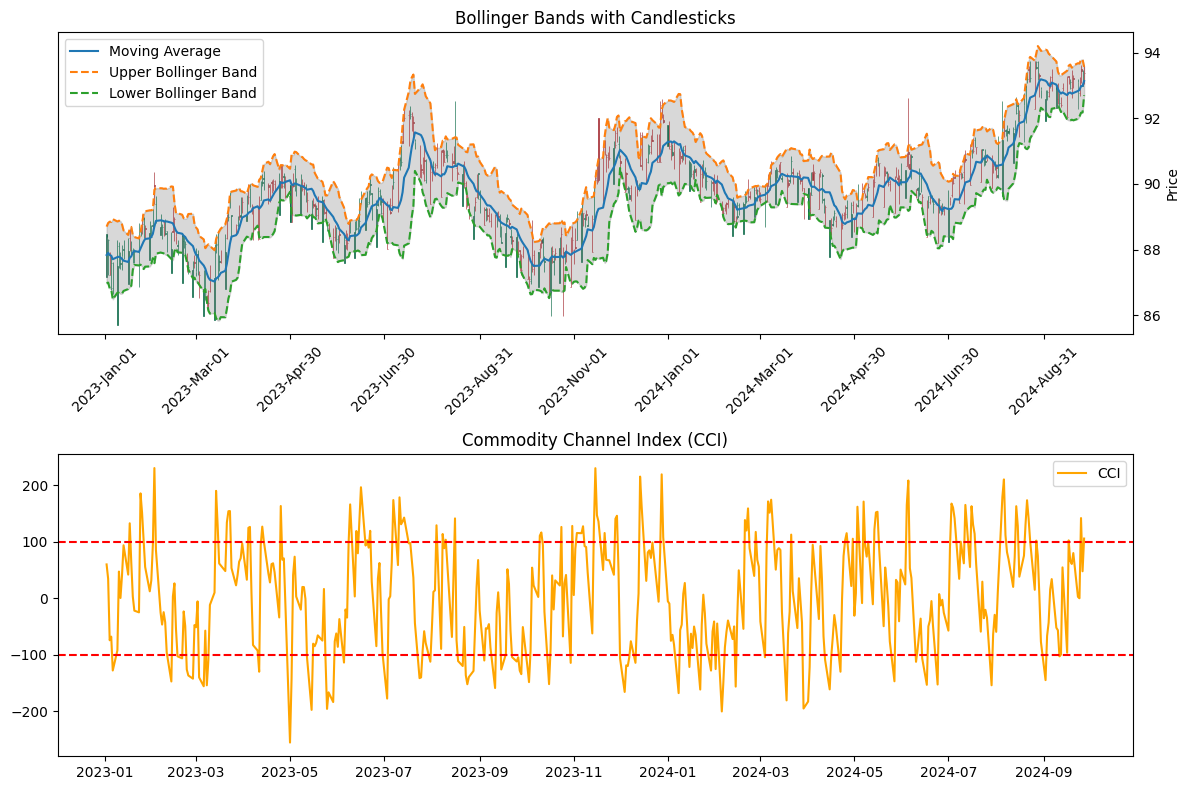

In [31]:

import matplotlib.pyplot as plt
import mplfinance as mpf
# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot Bollinger Bands with candlesticks
mpf.plot(data, type='candle', ax=ax1, style='charles', show_nontrading=True)
ax1.plot(data['moving_average'], label='Moving Average', linestyle='-')
ax1.plot(data['upper_band'], label='Upper Bollinger Band', linestyle='--')
ax1.plot(data['lower_band'], label='Lower Bollinger Band', linestyle='--')
ax1.fill_between(data.index, data['upper_band'], data['lower_band'], color='gray', alpha=0.3)
ax1.set_title('Bollinger Bands with Candlesticks')
ax1.legend(loc='best')  # Add legend

# Plot CCI
ax2.plot(data['CCI'], label='CCI', color='orange')
ax2.axhline(100, linestyle='--', color='red')
ax2.axhline(-100, linestyle='--', color='red')
ax2.set_title('Commodity Channel Index (CCI)')
ax2.legend(loc='best')  # Add legend

plt.tight_layout()
plt.show()